In [209]:
from Adaptor import Adaptor_xy, Adaptor_arc, Adaptor_rte, Combined_adaptor_xy, Combined_adaptor_arc
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt

In [210]:
# adaptor_xy = Adaptor_xy()
# adaptor_xy.load("adaptor_xy.json")
# # adaptor_xy.load("new_adaptor_xy.json")
# adaptor_arc = Adaptor_arc()
# adaptor_arc.load("adaptor_arc.json")
# # adaptor_arc.load("new_adaptor_arc.json")

adaptor_xy = Combined_adaptor_xy()
adaptor_xy.load("combined_xy")
# adaptor_xy.load("new_adaptor_xy")

adaptor_arc = Combined_adaptor_arc()
# adaptor_arc.load("combined_arc")
adaptor_arc.load("new_adaptor_arc")

adaptor_rte = Adaptor_rte(v=0.5)

In [211]:
coor_x = np.load("coor_x.npy")
coor_y = np.load("coor_y.npy")
coor_v = np.load("coor_v.npy")
coor_w = np.load("coor_w.npy")
coor_phi = np.load("coor_phi.npy")
baselines = np.load("filtered_baseline.npy")

dmg_0_case = np.load("f=0.95_s=0.95_dmg0.npy")
dmg_1_case = np.load("f=0.85_s=0.9_dmg1.npy")
dmg_2_case = np.load("f=0.73_s=0.92_dmg2.npy")
dmg_3_case = np.load("f=0.88_s=0.76_dmg3.npy")
dmg_4_case = np.load("f=0.77_s=0.82_dmg4.npy")

steps_taken = np.random.choice(len(baselines), size=36)


In [212]:
print(adaptor_xy.prior_weights)

[0.98 0.02]


In [213]:
errors = np.zeros(36)
# case = dmg_0_case
case = dmg_1_case
case = dmg_2_case
# case = dmg_3_case
# case = dmg_4_case
true_x = case[:, 0]
true_y = case[:, 1]

# coors, baselines, results

for i, index in enumerate(steps_taken):

    # if i:
    #     coor = np.vstack((coor_x[index], coor_y[index]))
    #     baseline = baselines[index].reshape(-1, 1)
    #     result = case[index].reshape(-1, 1)
    #     adaptor_xy.read_data(coor, baseline, result)
    
    # predicted_x, predicted_y = adaptor_xy.predict((coor_x, coor_y), baselines.T)


    if i:
        coor = np.vstack((coor_v[index], coor_w[index], coor_phi[index]))
        baseline = baselines[index].reshape(-1, 1)
        result = case[index].reshape(-1, 1)
        adaptor_arc.read_data(coor, baseline, result)
    
    predicted_x, predicted_y = adaptor_arc.predict((coor_v, coor_w, coor_phi), baselines.T)







    # if i:
    #     step_data = np.zeros((2, 3))
    #     step_data[:, 0] = baselines[index, 0]
    #     step_data[:, 1] = baselines[index, 1]
    #     step_data[0, 2] = case[index, 0] - baselines[index, 0]
    #     step_data[1, 2] = case[index, 1] - baselines[index, 1]
    #     adaptor_rte.read_data(step_data)
    #     # print(step_data[:, -1])
        
    # predicted_x, predicted_y = adaptor_rte.predict(baselines[:, :2])


    errors[i] = np.mean(np.square(predicted_x[:, 0] - true_x) + np.square(predicted_y[:, 0] - true_y))




1.9544670581817627 1.4375260029153278 0.6332618669403249


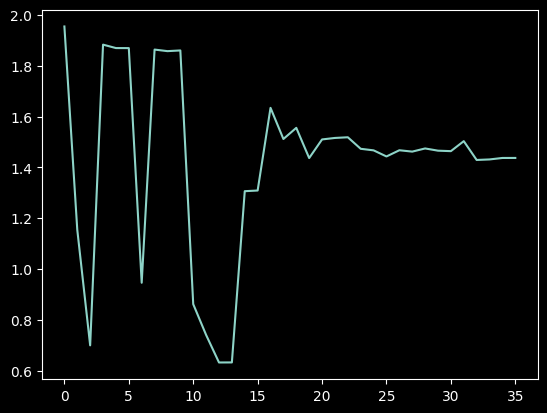

In [214]:
print(errors[0], errors[-1], np.min(errors))
plt.plot(np.arange(36), errors)
plt.show()

In [215]:
# print(adaptor_xy.adaptor_xy.posteriors)
# print(adaptor_xy.weights)
print(adaptor_arc.weights)

[8.89103399e-14 1.00000000e+00]


In [216]:
# x_data = np.concatenate(adaptor_rte.x_data, axis=0)
# # print(x_data.shape)
# # b = x_data[:, :-1] / 9 + 0.5
# # b = baseline[:, 0]/9 + 0.5
# # print(b.shape)
# # plt.hist(b)
# # plt.show()


# coor = x_data[:, :-1] / 9 + 0.5
# cov = adaptor_rte.kernel(coor) + np.eye(len(coor))*1e-6
# coors = baseline[:, :2].copy()
# matrix = adaptor_rte.kernel((coors/9 + 0.5), coor) @ lg.inv(adaptor_rte.kernel(coor) + np.eye(len(coor))*1e-6)

# print(matrix.shape)

# x_target = x_data[:, -1].reshape(-1, 1)


# plt.hist(matrix @ x_target)
# plt.show()
# plt.imshow(matrix)
# plt.colorbar()
# plt.show()